In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from numba import jit
import cmath, math, mpmath

In [67]:
def NumericalIntegration(f, a, b, h = 0.001):
    integral = 0
    x = a
    while x < b:
        integral += h * f(x)
        x += h
    return integral

In [79]:
def ComplexNumericalDifferentiation(function, z0, order = 1, h = 0.001):
    i = complex(0, 1)
    #integral = complex(0, 0)
    #phi = 0
    #while phi < 2 * cmath.pi:
    #    integral += h * function(z0 + cmath.exp(i * phi)) * cmath.exp(-i * order * phi)
    #    phi += h
    f = lambda _phi: function(z0 + np.exp(i * _phi)) * np.exp(-i * order * _phi)
    integral = NumericalIntegration(f, 0, 2 * np.pi, h)
    integral /= (2 * np.pi)
    integral *= mpmath.fac(order)
    return integral

In [17]:
def NumericalIntegration4(f, a, b, h = 0.001):
    integral = 0
    x = a
    while x < b:
        integral += h/8*(f(x-h*1)+3*f(x-h*2/3)+3*f(x-h*1/3)+f(x))
        x += h
    return integral

In [35]:
print(NumericalIntegration4(lambda x: np.sin(x), 0, np.pi))

1.9999993243810783


In [24]:
def ComplexNumericalDifferentiationNewtonCotes4(function, z0, order = 1, h = 0.001):

    i = complex(0, 1)
    integral = complex(0, 0)
    phi = 0
    while phi < 2 * cmath.pi:
        #integral += h * function(z0 + cmath.exp(i * phi)) * cmath.exp(-i * order * phi)
        f = lambda _phi: function(z0 + cmath.exp(i * _phi)) * cmath.exp(-i * order * _phi)
        integral += h/8*(f(phi-1)+3*f(phi-2/3)+3*f(phi-1/3)+f(phi))
        phi += h
    integral /= (2 * cmath.pi)
    integral *= mpmath.fac(order)
    return integral

In [68]:
def ComplexNumericalDifferentiationNewtonCotes4_(function, z0, order = 1, h = 0.001):

    i = complex(0, 1)
    f = lambda _phi: function(z0 + cmath.exp(i * _phi)) * cmath.exp(-i * order * _phi)
    integral = NumericalIntegration4(f, 0, 2 * cmath.pi, h)
    integral /= (2 * cmath.pi)
    integral *= mpmath.fac(order)
    return integral

In [151]:
#@jit
def ComplexNumericalDifferentiationNewtonCotesN(function, z0, order = 1, h = 0.001, N = 10):

    koefs = [
        [1,0,0,0,0,0,0,0,0,0],
        [1,1,0,0,0,0,0,0,0,0],
		[1,4,1,0,0,0,0,0,0,0],
		[1,3,3,1,0,0,0,0,0,0],
		[7,32,12,32,7,0,0,0,0,0],
		[19,75,50,50,75,19,0,0,0,0],
		[41,216,27,272,27,216,41,0,0,0],
		[751,3577,1323,2989,2989,1323,3577,751,0,0],
		[989,5888,-928,10496,-4540,10496,-928,5888,989,0],
		[2857,15741,1080,19344,5778,5778,19344,1080,15741,2857]
    ]
    #mltp = [1,1.0/2,1.0/3,3.0/8,2.0/45,5.0/288,1.0/140,7.0/17280,4.0/14175,9.0/89600]
    mltp = [1,1.0/2,1.0/3,1.0/8,1.0/45,1.0/288,1.0/140,1.0/17280,1.0/14175,1.0/89600]

    i = complex(0, 1)
    integral = complex(0, 0)
    phi = 0
    while phi < 2 * cmath.pi:
        #integral += h * function(z0 + cmath.exp(i * phi)) * cmath.exp(-i * order * phi)
        f = lambda _phi: function(z0 + cmath.exp(i * _phi)) * cmath.exp(-i * order * _phi)
        #integral += h/8*(f(phi-1)+3*f(phi-2/3)+3*f(phi-1/3)+f(phi))
        PartSum = complex(0, 0)
        for koef in koefs[N]:
            PartSum += koef * f(phi)
        integral += mltp[N] * PartSum * h
        phi += h
    integral /= (2 * cmath.pi)
    integral *= mpmath.fac(order)
    return integral

In [70]:
print(ComplexNumericalDifferentiation(lambda z: z**5, 2).real)

80.031507961122


In [51]:
print(ComplexNumericalDifferentiationNewtonCotes4(lambda z: z**5, 2).real)

80.0249937041696


In [52]:
print(ComplexNumericalDifferentiationNewtonCotes4_(lambda z: z**5, 2).real)

80.0315079506828


In [9]:
a = 0.1
print(ComplexNumericalDifferentiationNewtonCotes4(lambda x: np.sin(x)/(x-a), a-0.1).real)

-0.0165636961769187


In [153]:
print(ComplexNumericalDifferentiationNewtonCotesN(lambda z: z**5, 2).real)

80.031507961122


In [23]:
print(ComplexNumericalDifferentiation(lambda x: eval('x**2'), 2).real)

4.00116696151153


In [11]:
from math import atan

In [61]:
n = 25
a = -3
b = 3
func = 'np.arctan(x)'
d1func = '1/(x**2+1)'
d2func = '-2*x/(x**2+1)**2'
d5func = '(24*(5*x**4 - 10*x**2 + 1))/(x**2 + 1)**5'
d10func = '-(725760*x*(5*x**8 - 60*x**6 + 126*x**4 - 60*x**2 + 5))/(x**2 + 1)**10'
X = np.linspace(a, b, n, dtype=np.float64)
d1F = np.zeros(n, dtype=np.float64)
Cd1F = np.zeros(n, dtype=np.float64)

d2F = np.zeros(n, dtype=np.float64)
Cd2F = np.zeros(n, dtype=np.float64)
Cd2F4 = np.zeros(n, dtype=np.float64)
Cd2F4_ = np.zeros(n, dtype=np.float64)
#Cd2F10 = np.zeros(n, dtype=np.float64)

d5F = np.zeros(n, dtype=np.float64)
Cd5F = np.zeros(n, dtype=np.float64)
d10F = np.zeros(n, dtype=np.float64)
Cd10F = np.zeros(n, dtype=np.float64)
for idx, x in np.ndenumerate(X):
    d1F[idx] = eval(d1func)
    Cd1F[idx] = ComplexNumericalDifferentiation(lambda x: eval(func), x, 1).real
    
    d2F[idx] = eval(d2func)
    Cd2F[idx] = ComplexNumericalDifferentiation(lambda x: eval(func), x, 2).real
    Cd2F4[idx] = ComplexNumericalDifferentiationNewtonCotes4(lambda x: eval(func), x, 2).real
    Cd2F4_[idx] = ComplexNumericalDifferentiationNewtonCotes4_(lambda x: eval(func), x, 2).real
    #Cd2F10[idx] = ComplexNumericalDifferentiationNewtonCotesN(lambda x: eval(func), x, 2).real

    d5F[idx] = eval(d5func)
    Cd5F[idx] = ComplexNumericalDifferentiationNewtonCotes4(lambda x: eval(func), x, 5).real
    d10F[idx] = eval(d10func)
    Cd10F[idx] = ComplexNumericalDifferentiationNewtonCotes4(lambda x: eval(func), x, 10, 0.0001).real
    #serror = abs((iF[idx] - newF[idx])/iF[idx])
#avgerr = serror / (n * 10)
#print('ошибочка вышла:', avgerr)


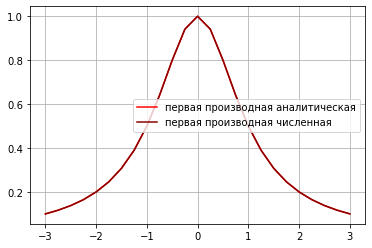

<Figure size 36000x36000 with 0 Axes>

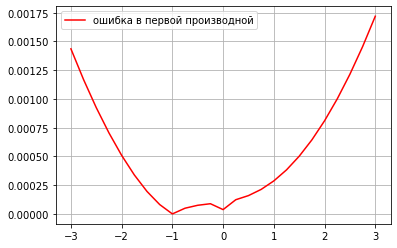

<Figure size 36000x36000 with 0 Axes>

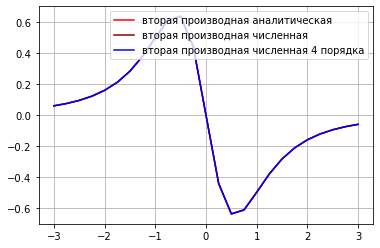

<Figure size 36000x36000 with 0 Axes>

C:\Users\rouol\AppData\Local\Temp/ipykernel_22484/2453533301.py:23: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X, np.abs(d2F-Cd2F)/np.abs(d2F), color='red', label='ошибка во второй производной')
C:\Users\rouol\AppData\Local\Temp/ipykernel_22484/2453533301.py:24: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X, np.abs(d2F-Cd2F4)/np.abs(d2F), color='blue', label='ошибка во второй производной 4 порядка')
C:\Users\rouol\AppData\Local\Temp/ipykernel_22484/2453533301.py:25: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X, np.abs(d2F-Cd2F4_)/np.abs(d2F), color='purple', label='ошибка во второй производной 4 порядка *h')


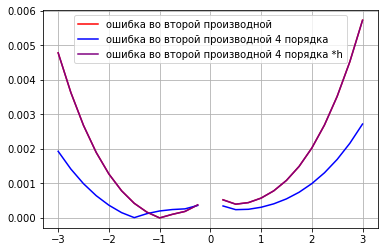

<Figure size 36000x36000 with 0 Axes>

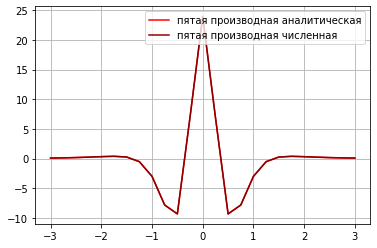

<Figure size 36000x36000 with 0 Axes>

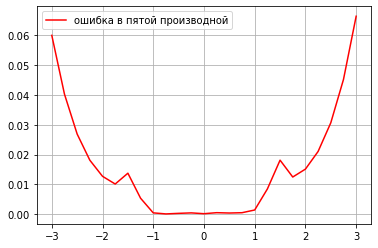

<Figure size 36000x36000 with 0 Axes>

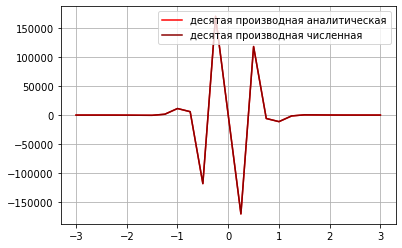

<Figure size 36000x36000 with 0 Axes>

C:\Users\rouol\AppData\Local\Temp/ipykernel_22484/2453533301.py:53: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(X, (np.abs(d10F-Cd10F)/np.abs(d10F)), color='red', label='ошибка в десятой производной')


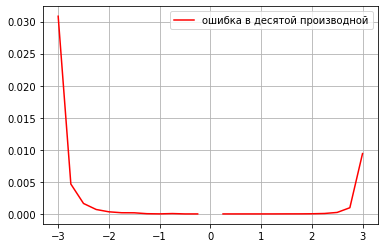

<Figure size 36000x36000 with 0 Axes>

In [62]:
plt.plot(X, d1F, color='red', label='первая производная аналитическая')
plt.plot(X, Cd1F, color='#8b0000', label='первая производная численная')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

plt.plot(X, np.abs(d1F-Cd1F)/np.abs(d1F), color='red', label='ошибка в первой производной')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

plt.plot(X, d2F, color='red', label='вторая производная аналитическая')
plt.plot(X, Cd2F, color='#8b0000', label='вторая производная численная')
plt.plot(X, Cd2F4, color='blue', label='вторая производная численная 4 порядка')
#plt.plot(X, Cd2F10, color='green', label='вторая производная численная 10 порядка')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

plt.plot(X, np.abs(d2F-Cd2F)/np.abs(d2F), color='red', label='ошибка во второй производной')
plt.plot(X, np.abs(d2F-Cd2F4)/np.abs(d2F), color='blue', label='ошибка во второй производной 4 порядка')
plt.plot(X, np.abs(d2F-Cd2F4_)/np.abs(d2F), color='purple', label='ошибка во второй производной 4 порядка *h')
#plt.plot(X, np.abs(d2F-Cd2F10)/np.abs(d2F), color='green', label='ошибка во второй производной 10 порядка')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

plt.plot(X, d5F, color='red', label='пятая производная аналитическая')
plt.plot(X, Cd5F, color='#8b0000', label='пятая производная численная')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

plt.plot(X, (np.abs(d5F-Cd5F)/np.abs(d5F)), color='red', label='ошибка в пятой производной')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

#'''
plt.plot(X, d10F, color='red', label='десятая производная аналитическая')
plt.plot(X, Cd10F, color='#8b0000', label='десятая производная численная')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

plt.plot(X, (np.abs(d10F-Cd10F)/np.abs(d10F)), color='red', label='ошибка в десятой производной')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()
#'''

In [161]:
true_value = 80
errors = {
    'h': [],
    'error': []
}
h = 10
for s in range(-7, 0, 1):
    ht = h ** s
    errors['h'].append(ht)
    value = float(ComplexNumericalDifferentiation(Function, 2, 1, ht).real)
    errors['error'].append(abs(true_value - value))
print(errors)

{'h': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1], 'error': [3.6153998763666095e-06, 2.6809721518361584e-05, 0.00018149202125528063, 0.0005682397477642098, 0.03150796112203125, 0.26355626263935505, 0.649836431911524]}


In [162]:
logerrors= {
    'h': np.log(errors['h']),
    'error': np.log(errors['error'])
}
logerrors

{'h': array([-16.11809565, -13.81551056, -11.51292546,  -9.21034037,
         -6.90775528,  -4.60517019,  -2.30258509]),
 'error': array([-12.53030809, -10.52674599,  -8.61429887,  -7.47296714,
         -3.45751503,  -1.33348841,  -0.43103459])}

No handles with labels found to put in legend.


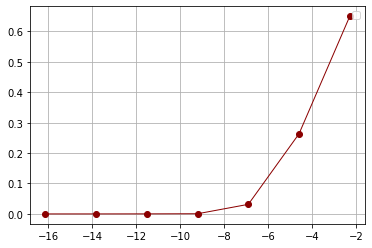

<Figure size 36000x36000 with 0 Axes>

In [164]:
plt.plot(logerrors['h'], errors['error'], color='#8b0000', marker='o', linewidth=1)#, label='заданные точки')
plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

In [75]:
def Function(z):
    return z**5
def dF(z):
    return 5 * z ** 4

In [76]:
def ComplexModulus(z):
    return math.sqrt((z.real)**2+(z.imag)**2)

In [82]:
D = 20
err = np.zeros((2 * D + 1, 2 * D + 1))
for i in range(-D, D + 1):
    for j in range(-D, D + 1):  
        if ComplexModulus(complex(i, j)) == 0:
            value = ComplexNumericalDifferentiation(Function, complex(i,j), order=1, h=0.01)
        else:
            value = ComplexNumericalDifferentiation(Function, complex(i,j), order=1, h=0.01*(1/ComplexModulus(complex(i, j))))
        true_value = dF(complex(i, j))
        if true_value == 0:
            err[i][j] = 0
        else:
            err[i][j] = ComplexModulus((value - true_value) / true_value).real

In [81]:
fig = go.Figure(data=
    go.Contour(
        x=[i for i in range(-D, D + 1)],
        y=[j for j in range(-D, D + 1)],
        z=err,
        line_smoothing=0.85,
        colorscale='RdBu',
        colorbar=dict(
            title='', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')),
        contours=dict(
            coloring ='heatmap',
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'black',
            )
        )))

fig.update_layout(
    autosize=False,
    width=600,
    height=600
)

fig.update_xaxes(
    constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"
)
'''
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)
'''

fig.show()
